<a href="https://colab.research.google.com/github/atharv-451/CIFER-10-using-RESNET50/blob/main/CIFER_10_Object_Recognition_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# Configuring the path of Kaggle.json file
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Dataset API
!kaggle competitions download -c cifar-10

100% 712M/715M [00:07<00:00, 139MB/s]
100% 715M/715M [00:07<00:00, 106MB/s]


In [4]:
# Extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The Dataset is Extracted")

The Dataset is Extracted


In [5]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 51.4 MB/s eta 0:00:00


In [6]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

In [7]:
!ls

 cifar-10.zip  '~p'	      sampleSubmission.csv   train      trainLabels.csv
 kaggle.json    sample_data   test.7z		     train.7z


Importing Dependencies

In [8]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [9]:
filenames = os.listdir('/content/train')

In [10]:
type(filenames)

list

In [11]:
len(filenames)

50000

**Labels Processing**

In [12]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [13]:
labels_df.shape

(50000, 2)

In [14]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [15]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [16]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [17]:
labels_dict = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dict[i] for i in labels_df['label']]

In [18]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


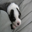

In [19]:
# Displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [20]:
id_list = list(labels_df['id'])

Image Processing

In [21]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id)+ '.png')
  image = np.array(image)
  data.append(image)

In [22]:
type(data)

list

In [23]:
len(data)

50000

In [24]:
data[0].shape

(32, 32, 3)

In [25]:
# Convert images and labels to numpy arrays

X = np.array(data)
Y = np.array(labels)

**Train Test Split**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
# Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

**BUILDING THE NEURAL NETWORK**

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
num_of_classes = 10

# Setting the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 197322 (770.79 KB)
Trainable params: 197322 (770.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Compile the neural network
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [31]:
#Training the neural Network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 5s 3ms/step - loss: 1.9775 - acc: 0.2813 - val_loss: 1.8455 - val_acc: 0.3352
Epoch 2/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.8450 - acc: 0.3322 - val_loss: 1.8160 - val_acc: 0.3450
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8037 - acc: 0.3474 - val_loss: 1.8081 - val_acc: 0.3435
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7874 - acc: 0.3536 - val_loss: 1.7722 - val_acc: 0.3620
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7763 - acc: 0.3573 - val_loss: 1.8098 - val_acc: 0.3465
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7673 - acc: 0.3618 - val_loss: 1.7605 - val_acc: 0.3715
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7549 - acc: 0.3678 - val_loss: 1.7740 - val_acc: 0.3540
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

**RESNET 50**

In [32]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [33]:
cnn_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
cnn_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [34]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [35]:
model.compile(
    optimizer = optimizers.RMSprop(learning_rate=2e-5),
    loss = 'sparse_categorical_crossentropy',
    metrics=['acc']
)

In [36]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 487s 405ms/step - loss: 1.6597 - acc: 0.4509 - val_loss: 0.8664 - val_acc: 0.7545
Epoch 2/10
1125/1125 [==============================] - 465s 413ms/step - loss: 1.0046 - acc: 0.7025 - val_loss: 0.4680 - val_acc: 0.8892
Epoch 3/10
1125/1125 [==============================] - 459s 408ms/step - loss: 0.7459 - acc: 0.8038 - val_loss: 0.3734 - val_acc: 0.9082
Epoch 4/10
1125/1125 [==============================] - 465s 413ms/step - loss: 0.5766 - acc: 0.8656 - val_loss: 0.2946 - val_acc: 0.9312
Epoch 5/10
1125/1125 [==============================] - 459s 408ms/step - loss: 0.4522 - acc: 0.9038 - val_loss: 0.2578 - val_acc: 0.9323
Epoch 6/10
1125/1125 [==============================] - 465s 413ms/step - loss: 0.3588 - acc: 0.9328 - val_loss: 0.2416 - val_acc: 0.9337
Epoch 7/10
1125/1125 [==============================] - 464s 412ms/step - loss: 0.2931 - acc: 0.9474 - val_loss: 0.2175 - val_acc: 0.9425
Epoch 8/10
1125/1125 [============

In [37]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Accuracy = ", accuracy)

313/313 [==============================] - 40s 124ms/step - loss: 0.2399 - acc: 0.9362
Test Accuracy =  0.9362000226974487


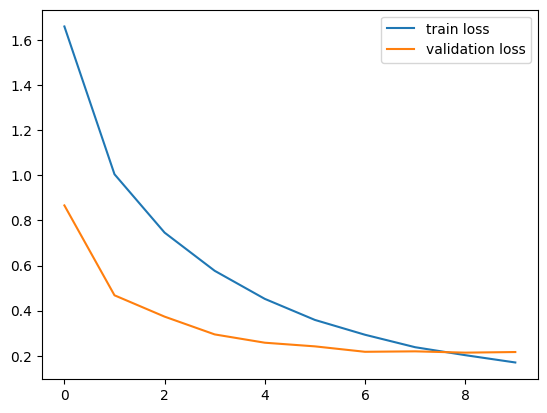

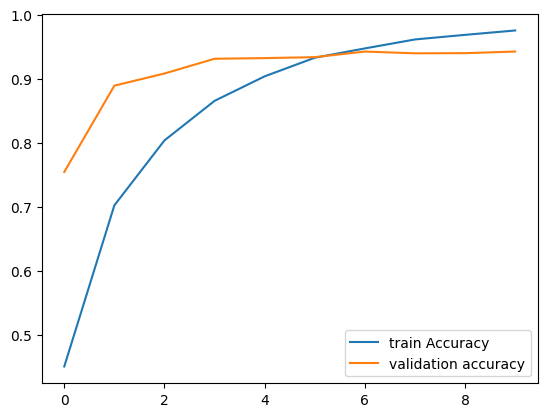

In [38]:
h = history

# Plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.plot(h.history['acc'], label='train Accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()